In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pkl
import random
import plotly.express as px
import time
import seaborn as sns

In [2]:
infile = open('..//3_k-means_clustering//apartment_data_frame_clustered_500_2021q2','rb')
frame = pkl.load(infile)
infile.close()

In [3]:
frame

,city,district,voivodeship,localization_y,localization_x,market,area,rooms,floor,floors,build_yr,price,url,price_of_sqm,cluster
0,Kraków,Podgórze,małopolskie,50.036500,20.015500,wtorny,46.30,2,6,8,2021.0,464000.0,https://gratka.pl/nieruchomosci/mieszkanie-kra...,10021.598272,242
1,Warszawa,Praga-Południe,mazowieckie,52.238088,21.115236,wtorny,80.91,2,2,5,2013.0,849000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,10493.140527,142
2,Katowice,Os. Paderewskiego,śląskie,50.252783,19.038932,pierwotny,44.21,2,1,9,2023.0,373100.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,8439.267134,326
3,Warszawa,Wola,mazowieckie,52.234980,20.961730,wtorny,34.00,1,1,5,1952.0,409900.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,12055.882353,412
4,Poznań,Stare Miasto,wielkopolskie,52.453445,16.915134,wtorny,46.70,2,1,15,1984.0,329000.0,https://gratka.pl/nieruchomosci/mieszkanie-poz...,7044.967880,411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50411,Kołobrzeg,kołobrzeski,zachodniopomorskie,54.175917,15.583267,wtorny,27.00,2,parter,2,1948.0,340000.0,https://gratka.pl/nieruchomosci/mieszkanie-kol...,12592.592593,274
50412,Pruszków,pruszkowski,mazowieckie,52.155775,20.804646,wtorny,48.42,2,2,3,2019.0,539000.0,https://gratka.pl/nieruchomosci/mieszkanie-pru...,11131.763734,245
50413,Kraków,Os. Prądnik Biały,małopolskie,50.092900,19.926700,pierwotny,54.00,3,4,5,2020.0,499002.0,https://gratka.pl/nieruchomosci/nowe-mieszkani...,9240.777778,264
50414,Warszawa,Bielany,mazowieckie,52.267688,20.947620,wtorny,82.00,2,11,11,2001.0,940000.0,https://gratka.pl/nieruchomosci/mieszkanie-war...,11463.414634,350


## data preparation for ann

In [4]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50416 entries, 0 to 50415
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   city            50416 non-null  object 
 1   district        42465 non-null  object 
 2   voivodeship     50416 non-null  object 
 3   localization_y  50416 non-null  float64
 4   localization_x  50416 non-null  float64
 5   market          50416 non-null  object 
 6   area            50416 non-null  float64
 7   rooms           50416 non-null  object 
 8   floor           50416 non-null  object 
 9   floors          50416 non-null  object 
 10  build_yr        50416 non-null  float64
 11  price           50416 non-null  float64
 12  url             50416 non-null  object 
 13  price_of_sqm    50416 non-null  float64
 14  cluster         50416 non-null  int32  
dtypes: float64(6), int32(1), object(8)
memory usage: 5.6+ MB


In [5]:
frame = frame.drop(['city','district','voivodeship','localization_y','localization_x','price_of_sqm','url'],axis=1)

In [6]:
frame.cluster = frame.cluster.apply(str)

In [7]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50416 entries, 0 to 50415
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   market    50416 non-null  object 
 1   area      50416 non-null  float64
 2   rooms     50416 non-null  object 
 3   floor     50416 non-null  object 
 4   floors    50416 non-null  object 
 5   build_yr  50416 non-null  float64
 6   price     50416 non-null  float64
 7   cluster   50416 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.1+ MB


## creating dummy variables

In [8]:
dummies = pd.get_dummies(frame[['market','rooms','floor','floors','cluster']],drop_first=True)
frame = frame.drop(['market','rooms','floor','floors','cluster'],axis=1)
frame = pd.concat([frame,dummies],axis=1)

In [9]:
frame

,area,build_yr,price,market_wtorny,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,rooms_7,...,cluster_90,cluster_91,cluster_92,cluster_93,cluster_94,cluster_95,cluster_96,cluster_97,cluster_98,cluster_99
0,46.30,2021.0,464000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.91,2013.0,849000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44.21,2023.0,373100.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,34.00,1952.0,409900.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.70,1984.0,329000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50411,27.00,1948.0,340000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50412,48.42,2019.0,539000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50413,54.00,2020.0,499002.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50414,82.00,2001.0,940000.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train test split

In [10]:
X = frame.drop('price',axis=1).values
y = frame.price.values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train= scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_train.shape

(37812, 572)

In [18]:
X_test.shape

(12604, 572)

In [19]:
X_train

array([[0.10038961, 0.93548387, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03376623, 0.97580645, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15298701, 0.73387097, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.12392208, 0.60483871, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14025974, 0.64516129, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1078961 , 0.96774194, 0.        , ..., 0.        , 0.        ,
        0.        ]])

## creating model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()

model.add(Dense(16,activation='relu',input_dim=X_test.shape[1]))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                9168      
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 9,657
Trainable params: 9,657
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [25]:
start = time.time()

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=256,epochs=1500,
          callbacks=[early_stop],
         )

stop = time.time()
print('\n',(stop-start)//60,'min.')

Train on 37812 samples, validate on 12604 samples
Epoch 1/1500
37812/37812 [==============================] - 1s 23us/sample - loss: 630755028124.0968 - val_loss: 623544610123.1508
Epoch 2/1500
37812/37812 [==============================] - 0s 9us/sample - loss: 628755315961.2568 - val_loss: 617530473482.0742
Epoch 3/1500
37812/37812 [==============================] - 0s 9us/sample - loss: 609323401342.5242 - val_loss: 576755711246.0552
Epoch 4/1500
37812/37812 [==============================] - 0s 8us/sample - loss: 530673426360.0719 - val_loss: 454279501357.9841
Epoch 5/1500
37812/37812 [==============================] - 0s 8us/sample - loss: 380443196465.9380 - val_loss: 300000252789.2352
Epoch 6/1500
37812/37812 [==============================] - 0s 9us/sample - loss: 274249496960.1219 - val_loss: 248572360344.5764
Epoch 7/1500
37812/37812 [==============================] - 0s 8us/sample - loss: 251130472813.4899 - val_loss: 238378645087.3805
Epoch 8/1500
37812/37812 [=============

Epoch 63/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 74043955953.7281 - val_loss: 67067624718.0552
Epoch 64/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 73059794932.7342 - val_loss: 66088325594.4652
Epoch 65/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 72129784222.0197 - val_loss: 65175855096.2006
Epoch 66/1500
37812/37812 [==============================] - 0s 10us/sample - loss: 71265820642.3188 - val_loss: 64333704684.3389
Epoch 67/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 70414082558.4293 - val_loss: 63606663462.4284
Epoch 68/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 69630653169.5115 - val_loss: 62891169596.3643
Epoch 69/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 68883003720.6593 - val_loss: 62126518925.8521
Epoch 70/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 681851

Epoch 126/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 48542789836.0851 - val_loss: 46108889988.8340
Epoch 127/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 48373200494.1128 - val_loss: 45988557490.2494
Epoch 128/1500
37812/37812 [==============================] - 0s 12us/sample - loss: 48174809875.3090 - val_loss: 45851652183.0936
Epoch 129/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 48056724639.1300 - val_loss: 45824888807.3018
Epoch 130/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 47838783420.1883 - val_loss: 45678038885.3113
Epoch 131/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 47684964313.2195 - val_loss: 45548067239.1190
Epoch 132/1500
37812/37812 [==============================] - 0s 11us/sample - loss: 47481638086.1272 - val_loss: 45529480441.2567
Epoch 133/1500
37812/37812 [==============================] - 0s 11us/sample - loss

37812/37812 [==============================] - 0s 11us/sample - loss: 41357654739.3970 - val_loss: 42756426071.8248

 1.0 min.


In [26]:
losses = pd.DataFrame(model.history.history)

Text(0.5, 1.0, 'Loss and validation loss')

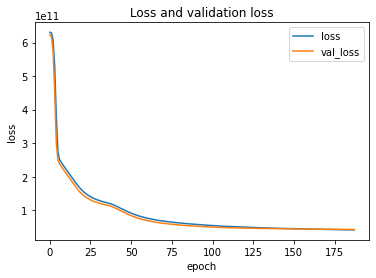

In [27]:
losses.plot()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss and validation loss')

(0.0, 100000000000.0)

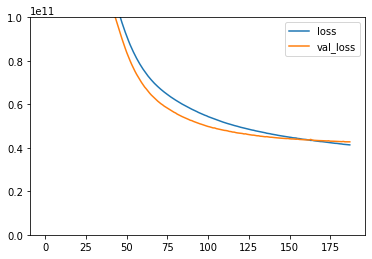

In [28]:
losses.plot()
plt.ylim(0,100000000000)

## model evaluation

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [30]:
predictions = model.predict(X_test)

In [31]:
mean_absolute_error(y_test,predictions)

94921.51424180817

In [32]:
np.sqrt(mean_squared_error(y_test,predictions))

206776.27087125805

In [34]:
r2_score(y_test,predictions)

0.8387795408454164

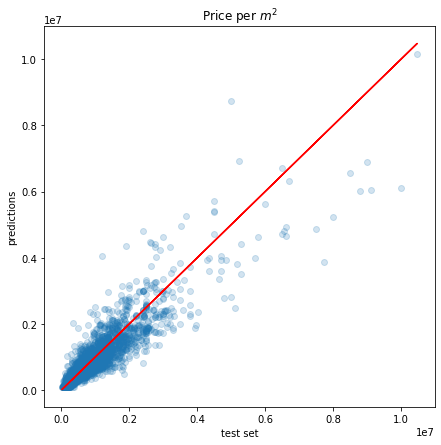

In [35]:
plt.figure(figsize=(7,7))
# plt.xlim(0,500)
# plt.ylim(0,500)

# Our predictions
plt.scatter(x=y_test,y=predictions,edgecolor=None,alpha=0.2)
plt.xlabel('test set')
plt.ylabel('predictions')
plt.title('Price per $m^{2}$')

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [36]:
errors = y_test.reshape(y_test.shape[0], 1) - predictions

Text(0.5, 1.0, 'Error distribution')

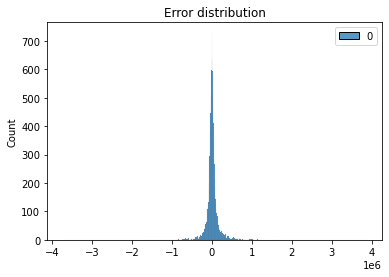

In [37]:
# plt.xlim(-200000,200000)

sns.histplot(errors)
plt.title('Error distribution')

In [38]:
predictions.reshape(y_test.shape[0])[:20]

array([ 351808.06,  333296.44,  490624.3 ,  439353.47,  370223.  ,
       1581696.6 ,  725982.2 , 1729158.9 ,  131028.04, 1911294.5 ,
        683763.75,  413451.94,  523893.34,  265191.1 ,  324702.97,
        463405.72,  162111.7 ,  317593.9 ,  422105.34,  409944.28],
      dtype=float32)

In [39]:
y_test[:20]

array([ 325000.,  417342.,  480000.,  420000.,  410000., 1682000.,
        810000., 2400000.,  119000., 1500000.,  572000.,  475000.,
        941097.,  248000.,  365000.,  439000.,  266811.,  314188.,
        412100.,  400000.])

In [40]:
predictions.reshape(y_test.shape[0])[:20]/y_test[:20]

array([1.08248635, 0.79861705, 1.02213398, 1.04607969, 0.90298293,
       0.9403666 , 0.89627431, 0.72048286, 1.10107596, 1.27419633,
       1.19539117, 0.87042513, 0.55668368, 1.06931893, 0.88959717,
       1.05559389, 0.60759003, 1.01084034, 1.02427892, 1.0248607 ])

## saving data

In [41]:
from datetime import datetime
from tensorflow.keras.models import load_model
timestamp = datetime.now().strftime("%Y-%m-%d--%H-%M")
model.save('models_ann\\' + '2021q2_500_' + timestamp)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models_ann\2021q2_500_2021-07-13--17-29\assets


In [42]:
import joblib
joblib.dump(scaler, 'scaler_500_2021q2')

['scaler_500_2021q2']